## <center>__PROJETO DA UNIDADE 2__</center>

# <center>__Modelagem de Tópicos com NMF e SVD__</center>
#### <center>__ALUNO: ALYSON MATHEUS VALE DE MACEDO__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

A modelagem de tópicos com NMF e SVD é uma ótima forma de fatorações de matrizes. Em álgebra linear, a decomposição em valores singulares ou 
singular value decomposition (SVD) é a fatorização de uma matriz real ou complexa, com diversas aplicações importantes em processamento de 
sinais e estatística. A fatoração matricial não negativa (NMF) é um método estatístico que nos ajuda a reduzir a dimensão dos corpora ou corpora de entrada. Internamente, ele usa o método de análise fatorial para dar comparativamente menos peso às palavras que estão tendo menos coerência. 

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Grandes quantidades de dados são coletadas todos os dias. À medida que tem mais informações que se tornam disponíveis, torna-se mais difícil acessar o que estamos procurando. Assim, precisamos de ferramentas e técnicas para organizar, pesquisar e compreender grandes quantidades de informação.

A modelagem de tópicos nos fornece métodos para organizar, entender e resumir grandes coleções de informações textuais. Ele ajuda em:

* Descobrindo padrões tópicos ocultos que estão presentes em toda a coleção
* Anotar documentos de acordo com esses tópicos
* Usando essas anotações para organizar, pesquisar e resumir textos



<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

## Decomposição de Valor Singular (SVD) 

Esperamos claramente que as palavras que aparecem com mais frequência em um tópico apareçam com menos frequência no outro - caso contrário, essa palavra não seria uma boa escolha para separar os dois tópicos. Portanto, esperamos que os tópicos sejam ortogonais .

O algoritmo SVD fatora uma matriz em uma matriz com colunas ortogonais e outra com linhas ortogonais (junto com uma matriz diagonal, que contém a importância relativa de cada fator).


SVD é uma decomposição exata , pois as matrizes que ele cria são grandes o suficiente para cobrir totalmente a matriz original. O SVD é extremamente usado em álgebra linear e, especificamente, em ciência de dados, incluindo:

* análise semântica
* filtragem/recomendações colaborativas ( participação vencedora do Prêmio Netflix )
* calcule o pseudoinverso de Moore-Penrose
* compressão de dados
* análise de componentes principais (será abordada posteriormente no curso)

<img src="svd_fb.png" alt="" />
Fonte: (<link>https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb</link>)

## Fatoração de matriz não negativa

Fatoração de Matriz Não Negativa: Para uma matriz A de dimensões mxn, onde cada elemento é ≥ 0, NMF pode fatorá-lo em duas matrizes W e H com 
dimensões mxk e kxn respectivamente e essas duas matrizes contêm apenas elementos não negativos. Aqui, a matriz A é definida como:
    
Onde:
 * A -> Matriz de entrada original (combinação linear de W e H) 
 * W -> Matriz de recursos
 * H -> Matriz de coeficientes (pesos associados a W) 
 * k -> Aproximação de classificação baixa de A ( k ≤ min(m,n) )
 

Esse método é amplamente utilizado na realização de tarefas como redução de recursos no Reconhecimento Facial e para diversas tarefas de PNL. 

<img src="Intuition1.png" alt="" />
Fonte: (<link>https://www.geeksforgeeks.org/non-negative-matrix-factorization/</link>)<br>

O objetivo do NMF é a redução de dimensionalidade e extração de características. Assim, quando definimos menor dimensão como k, o objetivo do NMF é encontrar duas matrizes W ∈ Rm×k e H ∈ Rn×k tendo apenas elementos não negativos.

## Modelagem de tópicos e alocação de Dirichlet latente (LDA) em Python

A modelagem de tópicos é um tipo de modelagem estatística para descobrir os “tópicos” abstratos que ocorrem em uma coleção de documentos. Latent Dirichlet Allocation (LDA) é um exemplo de modelo de tópico e é usado para classificar o texto em um documento para um tópico específico. Ele constrói um modelo de tópico por documento e palavras por modelo de tópico, modelado como distribuições de Dirichlet.
Aqui vamos aplicar o LDA a um conjunto de documentos e dividi-los em tópicos. 

1. Identifique as unidades de texto que melhor definem a tarefa em mãos e adicione-as como vértices no gráfico.
2. Identifique as relações que conectam essas unidades de texto e use essas relações para desenhar arestas entre os vértices no gráfico. As arestas podem ser direcionadas ou não direcionadas, ponderadas ou não ponderadas.
3. Itere o algoritmo de classificação baseado em gráfico até a convergência.
4. Classifique os vértices com base em sua pontuação final. Use os valores anexados a cada vértice para decisões de classificação/seleção.

<img src="img25.gif" alt="" />
Fonte: (<link>https://www.kdnuggets.com/2016/07/text-mining-101-topic-modeling.html/</link>)<br>

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
np.set_printoptions(suppress=True)

## Vamos tentar isso com duas fatorações de matrizes diferentes: Decomposição de Valor Singular (SVD) e Fatoração de Matriz Não Negativa (NMF)

In [6]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [7]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [8]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [9]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

O atributo target é o índice inteiro da categoria.

In [10]:
print(newsgroups_train.target[:10])

num_topics, num_top_words = 6, 8

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[1 3 2 0 2 0 2 1 2 1]


O scikit learn tem um método que extrairá todas as contagens de palavras para nós.

In [13]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
print(vectors.shape) #, vectors.nnz / vectors.shape[0], row_means.shape
print()

print(len(newsgroups_train.data), vectors.shape)

vocab = np.array(vectorizer.get_feature_names())

print()

print (vocab.shape)

print()

print(vocab[7000:7020])

(2034, 26576)

2034 (2034, 26576)

(26576,)

['cosmonauts' 'cosmos' 'cosponsored' 'cost' 'costa' 'costar' 'costing'
 'costly' 'costruction' 'costs' 'cosy' 'cote' 'couched' 'couldn' 'council'
 'councils' 'counsel' 'counselees' 'counselor' 'count']


## SVD

In [14]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 19.2 s


In [15]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


Confirma se essa é uma decomposição da entrada

O que podemos dizer sobre os valores singulares s?

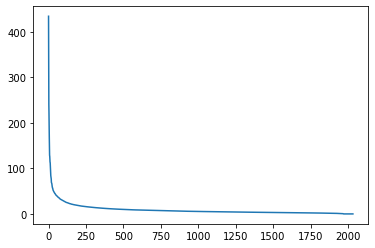

In [56]:
plt.plot(s);

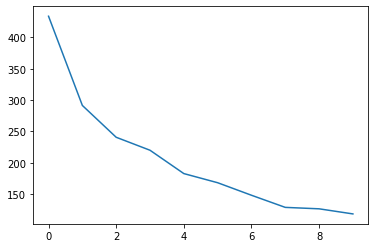

In [57]:
plt.plot(s[:10])

In [16]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [17]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

Obtemos tópicos que correspondem aos tipos de clusters que esperaríamos. Isso apesar do fato de que este é um algoritmo não supervisionado, ou seja, nunca dissemos ao algoritmo como nossos documentos são agrupados.

Voltaremos ao SVD com muito mais detalhes. Por enquanto, o importante é que temos uma ferramenta que nos permite fatorar exatamente uma matriz em colunas ortogonais e linhas ortogonais.

## NMF

Frequência de Documento Inverso de Frequência de Tópico (TF-IDF) é uma maneira de normalizar a contagem de termos levando em consideração a frequência com que eles aparecem em um documento, quanto tempo o documento é e quão comum/raro é o termo.

In [18]:
m,n = vectors.shape
d = 5 

clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [65]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

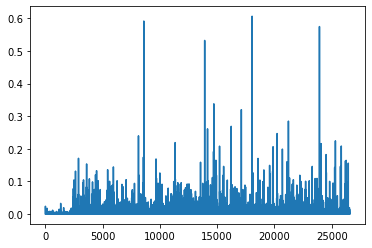

In [66]:
plt.plot(clf.components_[0])

In [67]:
clf.reconstruction_err_

43.71292605795278

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

O primeiro caso foi para verificar o texto e verificar os tópicos mais utilizados no texto, onde a fatorização de matriz faz as verificações. Verificando oa posição que deseja ou até mesmo a categoria. Então se precisa achar algo em algum documento ele é algo execelente para mineração.